In [37]:
%run ./Utils.ipynb

In [67]:
# Load dataset function
def load_dataset():
    """Load dataset from files
    Returns
    -------
    train_X : array-like, shape (n_samples_train, n_features)  
              with train samples
    train_Y : array-like, shape (n_samples_train, 1) 
              with train labels
    train_X : array-like, shape (n_samples_test, n_features) 
              with test samples
    train_Y : array-like, shape (n_samples_test, 1) 
              with test labels
    """
    train_X = np.load(f"train_{COLLECTION_FILE_NAME}_x.npy")
    train_Y = np.load(f"train_{COLLECTION_FILE_NAME}_y.npy")
    test_X = np.load(f"test_{COLLECTION_FILE_NAME}_x.npy")
    test_Y = np.load(f"test_{COLLECTION_FILE_NAME}_y.npy")
    return train_X, train_Y, test_X, test_Y

In [68]:
# Load dataset to work with
X_train, Y_train, X_test, Y_test = load_dataset() 
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(320, 10304) (320,) (80, 10304) (80,)


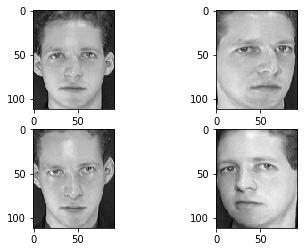

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = 1
for i in X_train[:4]:
    plt.subplot(2, 2,ind)
    plt.imshow(i.reshape((112,92)),cmap='gray')
    ind += 1

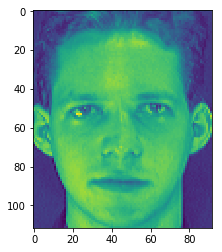

In [41]:
from matplotlib.pyplot import imshow
%matplotlib inline

imshow(X_train[0].reshape(112,92))

In [71]:
# Model realization
from scipy import stats

def euclidean_distance(q, p):
    """Count Euclidean Distance
    Parameters
    ----------
    q : array-like, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples
        and n_features is the number of features.
    p : array-like, shape (n_features,)
        Sample, where n_features is the number of features
    Returns
    -------
    array-like, shape (n_samples,)
    """
    return np.sqrt(np.sum((q - p)**2, axis=1))
    
def model(X_train, y_train, X_test, y_test, K):
    """Build classificator
    Return accuracy of predictions
    Parameters
    ----------
    X_train : array-like, shape (n_samples, n_features)
              Samples, where n_samples is the number of samples
              and n_features is the number of features.
    y_train : array-like, shape (n_samples,)
              Labels, where n_samples is the number of samples
    X_test  : array-like, shape (n_samples, n_features)
              Samples, where n_samples is the number of samples
              and n_features is the number of features.
    y_train : array-like, shape (n_samples,)
              Labels, where n_samples is the number of samples
    K       : int number, number for knn algorithm 
    Returns
    -------
    preidct : float number, precision of classification
    """
    predict = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        euclid_dist = euclidean_distance(X_train, X_test[i])
        indices = np.argsort(euclid_dist)[:K]
        predict[i] = stats.mode(y_train[indices])[0] == y_test[i]
    return predict.mean()

In [72]:
d = model(X_train, Y_train, X_test, Y_test.reshape(-1, 1), 3)
d

0.9375

In [44]:
# Shuffle function
def shuffle_samples(x, y):
    """Shuffle data of labels and samples
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples
        and n_features is the number of features.
    y : array-like, shape (n_samples, 1)
        Labels, where n_samples is the number of samples.
    Returns
    -------
    data[:,:-1] : array-like, shape (n_samples, n_features) 
    data[:,-1]  : array-like, shape (n_samples, label)
    """
    data = np.concatenate((x, y.reshape(-1,1)), axis=1)
    np.random.shuffle(data)
    return data[:,:-1] , data[:,-1]

In [45]:
# Extra shuffle for samples
X_train, Y_train = shuffle_samples(X_train, Y_train)
print(X_train.shape, Y_train.shape)

(320, 10304) (320,)


In [46]:
# Default scaling
def minmaxscaler(samples):
    """Scale features by maximum of data
    Parameters
    ----------
    samples : array-like, shape (n_samples, n_features)
              Samples, where n_samples is the number of samples
              and n_features is the number of features.
    Returns
    -------
    samples : array-like, same shape as samples
    """
    return samples/255.

# Scale images A
def scale_by_mean(samples, axis=0):
    """Scale features by mean of data depending on the axis value
    Parameters
    ----------
    samples : array-like, shape (n_samples, n_features)
              Samples, where n_samples is the number of samples
              and n_features is the number of features.
    axis    : number type of int(0, 1)
    Returns
    -------
    samples : array-like, same shape as samples
    """
    return samples - samples.mean(axis=axis,keepdims=True)

# Scale images B
def scale_by_mean_std(samples, axis=0):
    """Scale features by mean diveded by standart deviation
       of data depending on the axis value
    Parameters
    ----------
    samples : array-like, shape (n_samples, n_features)
              Samples, where n_samples is the number of samples
              and n_features is the number of features.
    axis    : number type of int(0, 1)
    Returns
    -------
    samples : array-like, same shape as samples
    """
    return scale_by_mean(samples, axis)/samples.std(axis=axis, keepdims=True)

In [47]:
# Scaling of samples by minmax
X_train_minmax = minmaxscaler(X_train)
X_test_minmax  = minmaxscaler(X_test)

print(X_train_minmax.shape, X_train_minmax.mean())
print(X_test_minmax.shape, X_test_minmax.mean())

d = model(X_train_minmax, Y_train, X_test_minmax, Y_test.reshape(-1, 1), 3)
d

(320, 10304) 0.4415062551854979
(80, 10304) 0.44243154666758017


0.9375

In [48]:
# Scale by mean axis=0
X_train_mean = scale_by_mean(X_train, axis=0)
X_test_mean  = scale_by_mean(X_test, axis=0)

print(X_train_mean.shape, X_train_mean.mean())
print(X_test_mean.shape, X_test_mean.mean())

d = model(X_train_mean, Y_train, X_test_mean, Y_test.reshape(-1, 1), 3)
d

(320, 10304) -1.1474603186187953e-16
(80, 10304) -1.1474603186187953e-15


0.925

In [49]:
# Scale by mean axis=1
X_train_mean_ax = scale_by_mean(X_train, axis=1)
X_test_mean_ax  = scale_by_mean(X_test, axis=1)

print(X_train_mean_ax.shape, X_train_mean_ax.mean())
print(X_test_mean_ax.shape, X_test_mean_ax.mean())

d = model(X_train_mean_ax, Y_train, X_test_mean_ax, Y_test.reshape(-1, 1), 3)
d

(320, 10304) -5.737301593093977e-16
(80, 10304) -5.295970701317517e-17


0.925

In [50]:
# Scale by mean std axis=0
X_train_mean_std = scale_by_mean_std(X_train, axis=0)
X_test_mean_std  = scale_by_mean_std(X_test, axis=0)

print(X_train_mean_std.shape, X_train_mean_std.mean())
print(X_test_mean_std.shape, X_test_mean_std.mean())

d = model(X_train_mean_std, Y_train, X_test_mean_std, Y_test.reshape(-1, 1), 3)
d

(320, 10304) 2.7583180736028732e-18
(80, 10304) -1.351575856065408e-17


0.9375

In [51]:
# Scale by mean std axis=1
X_train_mean_std_ax = scale_by_mean_std(X_train, axis=1)
X_test_mean_std_ax  = scale_by_mean_std(X_test, axis=1)

print(X_train_mean_std_ax.shape, X_train_mean_std_ax.mean())
print(X_test_mean_std_ax.shape, X_test_mean_std_ax.mean())

d = model(X_train_mean_std_ax, Y_train, X_test_mean_std_ax, Y_test.reshape(-1, 1), 3)
d

(320, 10304) -4.8442961167650466e-18
(80, 10304) 1.2964094945933505e-17


0.9125

In [17]:
# PCA realization
def get_data(A):
    """Count centered matrix C
    Parameters
    ----------
    A : array-like, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples
        and n_features is the number of features.
    Returns
    -------
    C : array-like, same shape as samples
    """
    # calculate the mean of each column
    M = np.mean(A, axis=0)
    # center columns by subtracting column means
    C =  A - M
    return C

def get_svd(C):
    """Count singular value decomposition of matrix C
    Method count explained variance and explained variance ratio
    Parameters
    ----------
    C : array-like, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples
        and n_features is the number of features.
    Returns
    -------
    values  : array-like, shape (n_features,) diagonal matrix of singular values
    vectors : array-like, shape (n_features, n_features)
    explained_variance       : shape (n_features,) where n_features is 
                               a number of components
    explained_variance_ratio : shape (n_features,) where n_features is 
                               a number of components
    """
    # svd method
    vectors, values, V = np.linalg.svd(C.T)
    
    # count diagonal matrix of eigenvector
    explained_variance = (values ** 2) / (C.shape[0] - 1)
    
    # count explained variance ratio     
    total_var = explained_variance.sum()
    explained_variance_ratio = explained_variance / total_var
    
    return values, vectors, explained_variance, explained_variance_ratio, V

def explained_variance(values, ratio):
    """ Count decision how many n components will be used
    Parameters
    ----------
    values : array-like, shape (n_components,)
             Explained variance ratio where n_components
             is the number of components.
    ratio  : float number, number in range (0, 1)
    Returns
    -------
    container : array-like, shape(n_components_reduced,)
                where n_components_reduced < n_components
    """
    container = []
    accumulator = 0. 

    for i in values:
        if accumulator <= ratio:
            accumulator += i
            container.append(i)
    
    return np.asarray(container)

def reduce_dimensions(matrix_W, n_comp, C):
    """ Apply dimension reduction for matrix C
    Parameters
    ----------
    matrix_W : array-like, shape (n_features, n_features)
               Matrix W, where n_features is the number of features.
    n_comp   : array-like, shape (n_components_reduced,) 
               Selected principal components, where n_components_reduced
               is a number of components to use.
    С        : array-like, shape (n_samples, n_features)
               Samples, where n_samples is the number of samples
               and n_features is the number of features.
    Returns
    -------
    C : array-like, shape(n_samples, n_components_reduced)
    """
    return C.dot(matrix_W.T[:n_comp.shape[0]].T)

In [44]:
# Fit X_train
train_matrix_C = get_data(X_train_mean_std)
eigen_values, eigen_vectors,exp_var, exp_ratio, V_matrix = get_svd(train_matrix_C)

exp_ratio_n_comp = explained_variance(exp_ratio, .95)

# Transform X_train
X_train_PCA_mean = reduce_dimensions(eigen_vectors, exp_ratio_n_comp, train_matrix_C)
print(X_train_PCA_mean.shape)

# Transform X_test
test_matrix_C = get_data(X_test_mean_std)

X_test_PCA_mean = reduce_dimensions(eigen_vectors, exp_ratio_n_comp, test_matrix_C)
print(X_test_PCA_mean.shape)

(320, 163)
(80, 163)


In [45]:
# PCA on scaled by mean std axis=0
d = model(X_train_PCA_mean, Y_train, X_test_PCA_mean, Y_test.reshape(-1, 1), 3)
d

0.9125

In [30]:
# Fit X_train
train_matrix_C = get_data(X_train_minmax)
eigen_values, eigen_vectors,exp_var, exp_ratio, V_matrix = get_svd(train_matrix_C)

exp_ratio_n_comp = explained_variance(exp_ratio, .99)
# Transform X_train
X_train_PCA_minmax = reduce_dimensions(eigen_vectors, exp_ratio_n_comp, train_matrix_C)
print(X_train_PCA_minmax.shape)

# Transform X_test
test_matrix_C = get_data(X_test_minmax)

X_test_PCA_minmax = reduce_dimensions(eigen_vectors, exp_ratio_n_comp, test_matrix_C)
print(X_test_PCA_minmax.shape)

(320, 265)
(80, 265)


In [31]:
# PCA on default
d = model(X_train_PCA_minmax, Y_train, X_test_PCA_minmax, Y_test.reshape(-1, 1), 3)
d

0.925

In [190]:
# LBP realization
def filter_step(A):
    accumulator = 0.
    neighbor_intensity = np.asarray([A[0,-1], A[1,-1], A[2,-1],
                          A[2,-2], A[2,-3], A[1, -3], 
                          A[0, -3], A[0, -2]])
    
    for i in range(neighbor_intensity.shape[0]):
        if (A[1,1] > neighbor_intensity[i]): accumulator += 2**i
            
    return accumulator

def apply_lbp_to_image(X):    
    X_pad = np.pad(X, 1, 'constant', constant_values=0)
    X_transformed = np.zeros(X.shape)
    
    for h in range(1, X.shape[0] + 1):
        for w in range(1, X.shape[1] + 1):
            X_transformed[h - 1, w - 1] = filter_step(X_pad[h-1:h+2 , w-1:w+2])
            
    return X_transformed

def apply_lbp_to_data(samples):
    processed_samples = []
    
    for sample in samples.reshape((-1, 112, 92)):
        lbp_img = apply_lbp_to_image(sample)
        (hist,_) = np.histogram(lbp_img, bins=112)
        hist = hist.astype("float")
        hist += 1e-7
        processed_samples.append(hist)
        
    return np.asarray(processed_samples)

In [191]:
# LBP

X_train_lbp = apply_lbp_to_data(X_train)
X_test_lbp  = apply_lbp_to_data(X_test)

In [196]:
print(X_train_lbp.shape)
print(X_test_lbp.shape)

(320, 112)
(80, 112)


In [194]:
# Model realization Chi-Square
from scipy import stats

def chi_square_distance(q, p):
    """Count Chi-Square Distance
    Parameters
    ----------
    q : array-like, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples
        and n_features is the number of features.
    p : array-like, shape (n_features,)
        Sample, where n_features is the number of features
    Returns
    -------
    array-like, shape (n_samples,)
    """
    return np.sum((q - p)**2/p, axis=1)
    
def model_2(X_train, y_train, X_test, y_test, K):
    """Build classificator
    Return accuracy of predictions
    Parameters
    ----------
    X_train : array-like, shape (n_samples, n_features)
              Samples, where n_samples is the number of samples
              and n_features is the number of features.
    y_train : array-like, shape (n_samples,)
              Labels, where n_samples is the number of samples
    X_test  : array-like, shape (n_samples, n_features)
              Samples, where n_samples is the number of samples
              and n_features is the number of features.
    y_train : array-like, shape (n_samples,)
              Labels, where n_samples is the number of samples
    K       : int number, number for knn algorithm 
    Returns
    -------
    preidct : float number, precision of classification
    """
    predict = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        euclid_dist = chi_square_distance(X_train, X_test[i])
        indices = np.argsort(euclid_dist)[:K]
        predict[i] = stats.mode(y_train[indices])[0] == y_test[i]
    return predict.mean()

In [195]:
d = model_2(X_train_lbp, Y_train, X_test_lbp, Y_test.reshape(-1, 1), 1)
d

0.875